In [37]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import pinv
import tqdm

def sigmoid(parameters,x):
    return 1/(1+np.exp(-np.transpose(np.dot(parameters,np.transpose(x)))))

def prediction(parameters,x):
    return sigmoid(parameters,x)

def gradient_descent(parameters, y, x):
    hypothesis = prediction(parameters,x)
    hessian = -np.dot((hypothesis*x).T,(1-hypothesis)*x)
    Error = y - hypothesis
    DelLL = np.sum(Error*x,axis = 0).T
    return -np.dot(pinv(hessian),DelLL)


In [38]:
logisticX = pd.read_csv("logisticX.csv")
logisticY = pd.read_csv("logisticY.csv")

x = logisticX.to_numpy()
# x = mean_normalization(x)
x_full = np.ones((x.shape[0],x.shape[1]+1))
x_full[:,1:] = x
x = x_full
y = logisticY.to_numpy()
print(x,y)

[[1.     3.6898 6.6051]
 [1.     2.7763 7.5057]
 [1.     3.1137 5.7724]
 [1.     2.9251 5.4315]
 [1.     3.6699 6.4406]
 [1.     2.8404 3.8136]
 [1.     3.7729 5.2398]
 [1.     2.6465 3.4946]
 [1.     4.0902 5.9298]
 [1.     3.3337 5.5294]
 [1.     1.44   5.8302]
 [1.     3.6919 5.0708]
 [1.     4.4506 3.629 ]
 [1.     4.7716 6.4982]
 [1.     3.7306 4.8439]
 [1.     4.9867 5.6805]
 [1.     4.1954 6.455 ]
 [1.     5.6164 6.0755]
 [1.     3.7672 4.6705]
 [1.     3.982  5.2395]
 [1.     3.9381 5.2835]
 [1.     4.0603 6.4953]
 [1.     4.3357 6.7917]
 [1.     4.5707 4.4346]
 [1.     2.5098 4.4806]
 [1.     2.2003 5.6314]
 [1.     4.8419 5.4988]
 [1.     4.4708 5.7022]
 [1.     2.6502 4.4475]
 [1.     3.4506 4.1548]
 [1.     5.3572 5.4207]
 [1.     2.3391 6.7416]
 [1.     3.8305 6.1357]
 [1.     2.1096 5.3812]
 [1.     3.674  5.1154]
 [1.     3.8091 4.3737]
 [1.     3.3172 6.4038]
 [1.     4.4469 6.3588]
 [1.     3.3633 5.3338]
 [1.     4.6922 5.8894]
 [1.     4.6014 5.774 ]
 [1.     3.2233 

In [48]:
parameters = np.zeros((1,x.shape[1]))
for i in range(100):
    change = gradient_descent(parameters,y,x)
    parameters = parameters + change
print(parameters)


[[ 0.55952206  1.93247687 -1.99558285]]


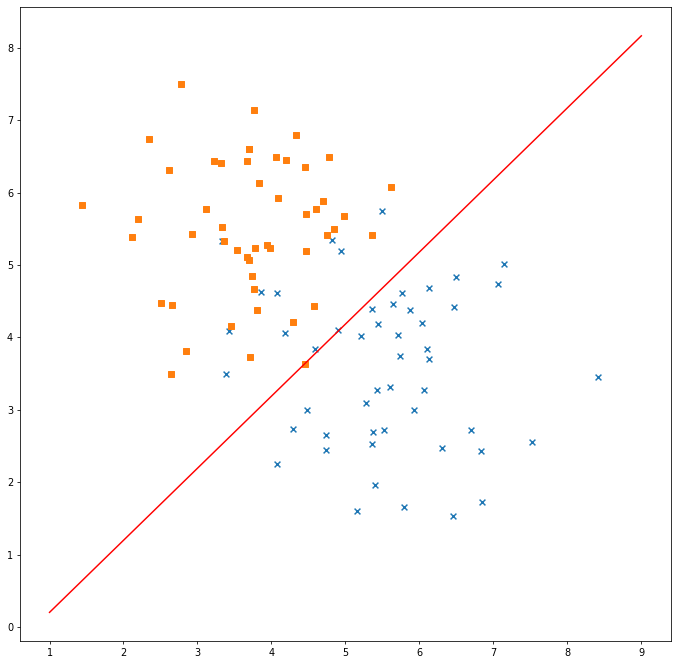

In [44]:
plt.rcParams['figure.dpi'] = 70
plt.rcParams['figure.figsize']=[12,12]
plt.scatter(x[np.where(y==1),1],x[np.where(y==1),2],marker='x')
plt.scatter(x[np.where(y==0),1],x[np.where(y==0),2],marker='s')
x_ax = np.linspace(1,9,100)
plt.plot(x_ax,((0.5-parameters[0,0])-parameters[0,1]*x_ax)/parameters[0,2],c = 'red')